In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("LoanApprovalPrediction.csv")

In [33]:
training_result = pd.DataFrame(columns=['Model', 'Accuracy'])
test_result = pd.DataFrame(columns=['Model', 'Accuracy'])

training_result_up = pd.DataFrame(columns=['Model', 'Accuracy'])
test_result_up= pd.DataFrame(columns=['Model', 'Accuracy'])

training_result_down = pd.DataFrame(columns=['Model', 'Accuracy'])
test_result_down = pd.DataFrame(columns=['Model', 'Accuracy'])

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
len(df['Loan_ID'])
df['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [36]:
df.head()
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
# loan Id is irrelevant for prediction
df.drop(['Loan_ID'],axis=1,inplace=True)

C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\2219162025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=id, data=df, palette='rainbow')
C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\2219162025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=id, data=df, palette='rainbow')
C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\2219162025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=id, data=df, palette='rainbow')
C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\2219162025.py:8: FutureWarning: 

Passing `pal

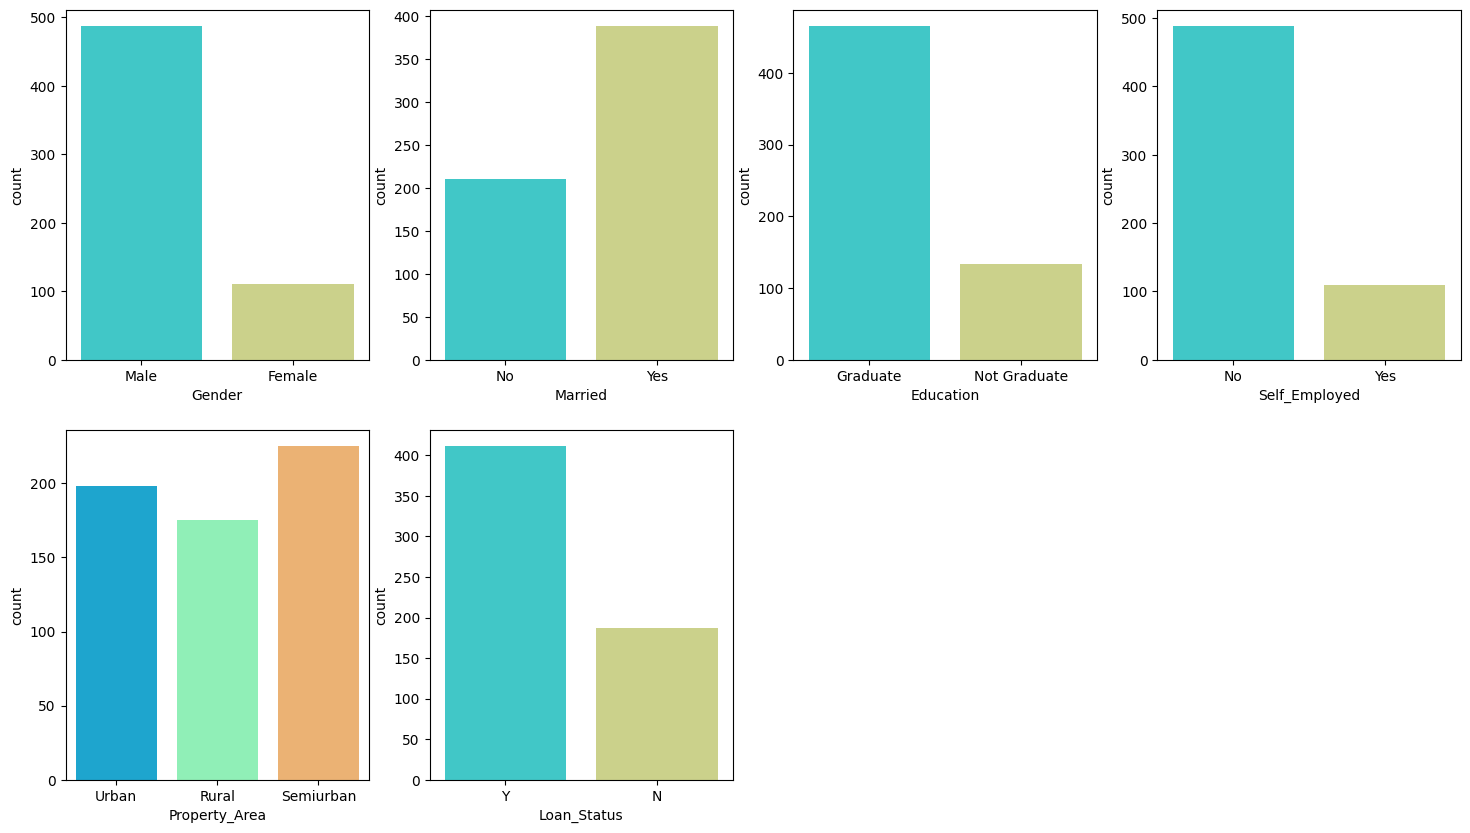

In [38]:
# finding no. of categories in certain features
obj = (df.dtypes == 'object')
features = list(obj[obj].index)
plt.figure(figsize=(18,10))
i = 1
for id in features:
  plt.subplot(2,4,i)
  sns.countplot(x=id, data=df, palette='rainbow')
  i += 1

In [39]:
# handling categorical data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
print(features)
for id in features:
  df[id] = label_encoder.fit_transform(df[id])

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [40]:
df.head()
df.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [41]:
# handling missing values
for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

In [42]:
from sklearn.model_selection import train_test_split

nodata = df[df['Loan_Status'] == 0]
yesdata = df[df['Loan_Status'] == 1]

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [43]:
len(nodata)

187

In [44]:
len(yesdata)

411

In [45]:
from sklearn.utils import resample
data_downsample = resample(yesdata, replace=True, n_samples=len(nodata), random_state=42)
data_downsample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
152,1,1,3.0,0,0,39999,0.0,600.0,180.000000,0.0,1,1
507,1,1,2.0,1,0,2192,1742.0,45.0,360.000000,1.0,1,1
389,1,1,0.0,0,0,3033,1459.0,95.0,360.000000,1.0,2,1
156,1,1,0.0,0,0,4583,5625.0,255.0,360.000000,1.0,1,1
108,1,0,0.0,0,0,5316,0.0,136.0,360.000000,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
414,1,1,0.0,0,0,1820,1719.0,100.0,360.000000,1.0,2,1
43,1,1,0.0,1,1,4695,0.0,96.0,341.917808,1.0,2,1
157,1,1,0.0,1,0,1863,1041.0,98.0,360.000000,1.0,1,1
70,1,1,2.0,1,1,1875,1875.0,97.0,360.000000,1.0,1,1


In [46]:
data_downsample = pd.concat([data_downsample, nodata], ignore_index= True)
data_downsample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3.000000,0,0,39999,0.0,600.000000,180.0,0.000000,1,1
1,1,1,2.000000,1,0,2192,1742.0,45.000000,360.0,1.000000,1,1
2,1,1,0.000000,0,0,3033,1459.0,95.000000,360.0,1.000000,2,1
3,1,1,0.000000,0,0,4583,5625.0,255.000000,360.0,1.000000,1,1
4,1,0,0.000000,0,0,5316,0.0,136.000000,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,1,2.000000,1,1,6383,1000.0,187.000000,360.0,1.000000,0,0
370,1,0,0.755973,0,0,2987,0.0,88.000000,360.0,0.000000,1,0
371,0,0,3.000000,0,1,416,41667.0,350.000000,180.0,0.843352,2,0
372,1,1,0.000000,1,0,2400,3800.0,144.968804,180.0,1.000000,2,0


In [47]:
data_upsample = resample(nodata, replace=True, n_samples=len(yesdata), random_state=42)
data_upsample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
332,1,1,3.0,1,0,2647,1587.0,173.0,360.000000,1.0,0,0
571,1,1,1.0,0,0,4283,3000.0,172.0,84.000000,1.0,0,0
292,0,0,0.0,0,0,5000,2541.0,151.0,480.000000,1.0,0,0
35,1,1,0.0,0,0,1828,1330.0,100.0,341.917808,0.0,2,0
345,0,1,0.0,0,1,5500,0.0,105.0,360.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,1,1.0,0,0,4283,3000.0,172.0,84.000000,1.0,0,0
551,1,1,2.0,0,0,8799,0.0,258.0,360.000000,0.0,2,0
206,1,1,3.0,0,0,3430,1250.0,128.0,360.000000,0.0,1,0
35,1,1,0.0,0,0,1828,1330.0,100.0,341.917808,0.0,2,0


In [48]:
data_upsample= pd.concat([data_upsample, yesdata], ignore_index= True)
data_upsample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3.0,1,0,2647,1587.0,173.0,360.000000,1.0,0,0
1,1,1,1.0,0,0,4283,3000.0,172.0,84.000000,1.0,0,0
2,0,0,0.0,0,0,5000,2541.0,151.0,480.000000,1.0,0,0
3,1,1,0.0,0,0,1828,1330.0,100.0,341.917808,0.0,2,0
4,0,1,0.0,0,1,5500,0.0,105.0,360.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
817,1,1,0.0,0,0,3232,1950.0,108.0,360.000000,1.0,0,1
818,0,0,0.0,0,0,2900,0.0,71.0,360.000000,1.0,0,1
819,1,1,3.0,0,0,4106,0.0,40.0,180.000000,1.0,0,1
820,1,1,1.0,0,0,8072,240.0,253.0,360.000000,1.0,2,1


In [49]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Y_train_pred = knn.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of KNN is = ", acc1)
print("Test accuracy score of KNN is = ", acc2)

dict1 = {'Model': ["KNN"], 'Accuracy': [acc1]}
dict2 = {'Model': ["KNN"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)


Training accuracy score of KNN is =  76.77824267782427
Test accuracy score of KNN is =  83.33333333333334


C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\454775817.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  training_result = pd.concat([training_result, dff1], ignore_index=True)
C:\Users\SHREYA\AppData\Local\Temp\ipykernel_17604\454775817.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_result = pd.concat([test_result, dff2], ignore_index=True)


In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 96,criterion = 'entropy',
                            random_state = 20, max_depth=50)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
Y_train_pred = rfc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Random Forest is = ", acc1)
print("Test accuracy score of Random Forest is = ", acc2)

dict1 = {'Model': ["Random Forest"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Random Forest"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Random Forest is =  100.0
Test accuracy score of Random Forest is =  83.33333333333334


In [52]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svc = SVC(kernel='linear')
lc = LogisticRegression(max_iter = 221)

In [63]:
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Y_train_pred = svc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of SVM is = ", acc1)
print("Test accuracy score of SVM is = ", acc2)

dict1 = {'Model': ["SVM"], 'Accuracy': [acc1]}
dict2 = {'Model': ["SVM"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of SVM is =  79.49790794979079
Test accuracy score of SVM is =  85.83333333333333


In [54]:
lc.fit(X_train, Y_train)
Y_pred = lc.predict(X_test)
Y_train_pred = lc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Logistic Regression is = ", acc1)
print("Test accuracy score of Logistic Regression is = ", acc2)

dict1 = {'Model': ["Logistic Regression"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Logistic Regression"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Logistic Regression is =  79.70711297071131
Test accuracy score of Logistic Regression is =  85.83333333333333


In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
Y_train_pred = gnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gaussian Naive Bayes is = ", acc1)
print("Test accuracy score of Gaussian Naive Bayes is = ", acc2)

dict1 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Gaussian Naive Bayes is =  79.2887029288703
Test accuracy score of Gaussian Naive Bayes is =  83.33333333333334


In [56]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

Y_pred = mnb.predict(X_test)
Y_train_pred = mnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Multinomial Naive Bayes is = ", acc1)
print("Test accuracy score of Multinomial Naive Bayes is = ", acc2)

dict1 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Multinomial Naive Bayes is =  69.24686192468619
Test accuracy score of Multinomial Naive Bayes is =  74.16666666666667


In [57]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

Y_pred = bnb.predict(X_test)
Y_train_pred = bnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bernoulli Naive Bayes is = ", acc1)
print("Test accuracy score of Bernoulli Naive Bayes is = ", acc2)


dict1 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Bernoulli Naive Bayes is =  79.9163179916318
Test accuracy score of Bernoulli Naive Bayes is =  83.33333333333334


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, max_features=12, random_state=7777)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
Y_train_pred = dt.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Decision Tree is = ", acc1)
print("Test accuracy score of Decision Tree is = ", acc2)


dict1 = {'Model': ["Decision Tree"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Decision Tree"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Decision Tree is =  82.00836820083683
Test accuracy score of Decision Tree is =  80.83333333333333


In [59]:
bg=BaggingClassifier(RandomForestClassifier(min_samples_split=5,max_depth=6),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, Y_train)

Y_pred = bg.predict(X_test)
Y_train_pred = bg.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bagging Classifier is = ", acc1)
print("Test accuracy score of Bagging Classifier is = ", acc2)


dict1 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Bagging Classifier is =  80.1255230125523
Test accuracy score of Bagging Classifier is =  85.83333333333333


In [60]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

Y_pred = ada.predict(X_test)
Y_train_pred = ada.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of AdaBoost is = ", acc1)
print("Test accuracy score of AdaBoost is = ", acc2)


dict1 = {'Model': ["AdaBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["AdaBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of AdaBoost is =  84.93723849372385
Test accuracy score of AdaBoost is =  79.16666666666666


C:\Users\SHREYA\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(n_estimators=100)
gdb.fit(X_train, Y_train)

Y_pred = gdb.predict(X_test)
Y_train_pred = gdb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gradient Boosting is = ", acc1)
print("Test accuracy score of Gradient Boosting is = ", acc2)


dict1 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

Training accuracy score of Gradient Boosting is =  88.91213389121339
Test accuracy score of Gradient Boosting is =  82.5


In [62]:
import catboost as Cat 
cb = Cat.CatBoostClassifier(random_state=7777, iterations=150, learning_rate=0.048)

cb.fit(X_train, Y_train)

Y_pred = cb.predict(X_test)
Y_train_pred = cb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of CatBoost is = ", acc1)
print("Test accuracy score of CatBoost is = ", acc2)

dict1 = {'Model': ["CatBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["CatBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
# from keras import layers
# from keras import models
# from keras import optimizers
# from keras import losses
# from keras import regularizers
# from keras import metrics
# from tqdm.keras import TqdmCallback

# # add validation dataset
# validation_split=100
# x_validation=X[:validation_split]
# x_partial_train=X[validation_split:]
# y_validation=Y[:validation_split]
# y_partial_train=Y[validation_split:]

# # build & compile model
# model=models.Sequential()
# model.add(layers.Dense(6,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(11,)))
# model.add(layers.Dropout(0.65))
# model.add(layers.Dense(6,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
# model.add(layers.Dropout(0.65))
# model.add(layers.Dense(1,activation='sigmoid'))
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# # fir the model
# model.fit(x_partial_train,y_partial_train,epochs=100,batch_size=50,validation_data=(x_validation,y_validation), callbacks=[TqdmCallback(verbose=0)],verbose=0)

# print('')
# print("score on test: " + str(model.evaluate(X_test,Y_test)[1]))

In [ ]:
from sklearn.model_selection import StratifiedKFold
import xgboost as XGBoost
xgb = XGBoost.XGBClassifier()

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)
Y_train_pred = xgb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of XGBoost is = ", acc1)
print("Test accuracy score of XGBoost is = ", acc2)

dict1 = {'Model': ["XGBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["XGBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result = pd.concat([training_result, dff1], ignore_index=True)
test_result = pd.concat([test_result, dff2], ignore_index=True)


Training accuracy score of XGBoost is =  100.0
Test accuracy score of XGBoost is =  77.5


In [ ]:
training_result, test_result

(                      Model    Accuracy
 0                       KNN   76.778243
 1             Random Forest  100.000000
 2                       SVM   79.916318
 3       Logistic Regression   79.707113
 4      Gaussian Naive Bayes   79.288703
 5   Multinomial Naive Bayes   69.246862
 6     Bernoulli Naive Bayes   79.916318
 7             Decision Tree   82.008368
 8        Bagging Classifier   80.125523
 9                  AdaBoost   84.937238
 10        Gradient Boosting   88.912134
 11                 CatBoost   80.962343
 12                  XGBoost  100.000000,
                       Model   Accuracy
 0                       KNN  83.333333
 1             Random Forest  83.333333
 2                       SVM  85.833333
 3       Logistic Regression  85.833333
 4      Gaussian Naive Bayes  83.333333
 5   Multinomial Naive Bayes  74.166667
 6     Bernoulli Naive Bayes  83.333333
 7             Decision Tree  80.833333
 8        Bagging Classifier  85.000000
 9                  AdaBo

In [ ]:
X = data_upsample.drop(['Loan_Status'],axis=1)
Y = data_upsample['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Y_train_pred = knn.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of KNN is = ", acc1)
print("Test accuracy score of KNN is = ", acc2)

dict1 = {'Model': ["KNN"], 'Accuracy': [acc1]}
dict2 = {'Model': ["KNN"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of KNN is =  74.1248097412481
Test accuracy score of KNN is =  69.0909090909091


C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_5204\499755671.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_5204\499755671.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 96,criterion = 'entropy',
                            random_state = 20, max_depth=50)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
Y_train_pred = rfc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Random Forest is = ", acc1)
print("Test accuracy score of Random Forest is = ", acc2)

dict1 = {'Model': ["Random Forest"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Random Forest"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Random Forest is =  100.0
Test accuracy score of Random Forest is =  90.9090909090909


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svc = SVC(kernel='poly', degree=3)
lc = LogisticRegression(max_iter = 221)

In [ ]:
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Y_train_pred = svc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of SVM is = ", acc1)
print("Test accuracy score of SVM is = ", acc2)

dict1 = {'Model': ["SVM"], 'Accuracy': [acc1]}
dict2 = {'Model': ["SVM"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of SVM is =  75.79908675799086
Test accuracy score of SVM is =  74.54545454545455


In [ ]:
lc.fit(X_train, Y_train)
Y_pred = lc.predict(X_test)
Y_train_pred = lc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Logistic Regression is = ", acc1)
print("Test accuracy score of Logistic Regression is = ", acc2)

dict1 = {'Model': ["Logistic Regression"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Logistic Regression"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Logistic Regression is =  72.14611872146118
Test accuracy score of Logistic Regression is =  73.93939393939394


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
Y_train_pred = gnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gaussian Naive Bayes is = ", acc1)
print("Test accuracy score of Gaussian Naive Bayes is = ", acc2)

dict1 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Gaussian Naive Bayes is =  73.36377473363774
Test accuracy score of Gaussian Naive Bayes is =  72.72727272727273


In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

Y_pred = mnb.predict(X_test)
Y_train_pred = mnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Multinomial Naive Bayes is = ", acc1)
print("Test accuracy score of Multinomial Naive Bayes is = ", acc2)

dict1 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Multinomial Naive Bayes is =  64.84018264840182
Test accuracy score of Multinomial Naive Bayes is =  61.212121212121204


In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

Y_pred = bnb.predict(X_test)
Y_train_pred = bnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bernoulli Naive Bayes is = ", acc1)
print("Test accuracy score of Bernoulli Naive Bayes is = ", acc2)


dict1 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Bernoulli Naive Bayes is =  70.62404870624049
Test accuracy score of Bernoulli Naive Bayes is =  77.57575757575758


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, max_features=12, random_state=7777)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
Y_train_pred = dt.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Decision Tree is = ", acc1)
print("Test accuracy score of Decision Tree is = ", acc2)


dict1 = {'Model': ["Decision Tree"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Decision Tree"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Decision Tree is =  78.99543378995433
Test accuracy score of Decision Tree is =  73.93939393939394


In [ ]:
bg=BaggingClassifier(RandomForestClassifier(min_samples_split=5,max_depth=6),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, Y_train)

Y_pred = bg.predict(X_test)
Y_train_pred = bg.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bagging Classifier is = ", acc1)
print("Test accuracy score of Bagging Classifier is = ", acc2)


dict1 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Bagging Classifier is =  84.62709284627093
Test accuracy score of Bagging Classifier is =  80.60606060606061


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

Y_pred = ada.predict(X_test)
Y_train_pred = ada.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of AdaBoost is = ", acc1)
print("Test accuracy score of AdaBoost is = ", acc2)


dict1 = {'Model': ["AdaBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["AdaBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of AdaBoost is =  82.95281582952816
Test accuracy score of AdaBoost is =  75.75757575757575


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(n_estimators=100)
gdb.fit(X_train, Y_train)

Y_pred = gdb.predict(X_test)
Y_train_pred = gdb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gradient Boosting is = ", acc1)
print("Test accuracy score of Gradient Boosting is = ", acc2)


dict1 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of Gradient Boosting is =  92.08523592085236
Test accuracy score of Gradient Boosting is =  82.42424242424242


In [ ]:
import catboost as Cat 
cb = Cat.CatBoostClassifier(random_state=7777, iterations=150, learning_rate=0.048)

cb.fit(X_train, Y_train)

Y_pred = cb.predict(X_test)
Y_train_pred = cb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of CatBoost is = ", acc1)
print("Test accuracy score of CatBoost is = ", acc2)

dict1 = {'Model': ["CatBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["CatBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

0:	learn: 0.6823533	total: 2.23ms	remaining: 332ms
1:	learn: 0.6751273	total: 5.81ms	remaining: 430ms
2:	learn: 0.6646145	total: 7.77ms	remaining: 381ms
3:	learn: 0.6556992	total: 9.95ms	remaining: 363ms
4:	learn: 0.6462249	total: 12.5ms	remaining: 362ms
5:	learn: 0.6362955	total: 14.3ms	remaining: 343ms
6:	learn: 0.6279659	total: 16.2ms	remaining: 331ms
7:	learn: 0.6219749	total: 18.3ms	remaining: 325ms
8:	learn: 0.6143680	total: 21ms	remaining: 329ms
9:	learn: 0.6082852	total: 23.3ms	remaining: 326ms
10:	learn: 0.6020659	total: 26.2ms	remaining: 331ms
11:	learn: 0.5956818	total: 28.2ms	remaining: 324ms
12:	learn: 0.5894618	total: 30ms	remaining: 316ms
13:	learn: 0.5838464	total: 32ms	remaining: 311ms
14:	learn: 0.5786463	total: 33.9ms	remaining: 305ms
15:	learn: 0.5738519	total: 36ms	remaining: 301ms
16:	learn: 0.5690677	total: 39.1ms	remaining: 306ms
17:	learn: 0.5630343	total: 42.1ms	remaining: 308ms
18:	learn: 0.5586562	total: 43.3ms	remaining: 298ms
19:	learn: 0.5541721	total: 45

In [ ]:
from sklearn.model_selection import StratifiedKFold
import xgboost as XGBoost
xgb = XGBoost.XGBClassifier()

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)
Y_train_pred = xgb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of XGBoost is = ", acc1)
print("Test accuracy score of XGBoost is = ", acc2)

dict1 = {'Model': ["XGBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["XGBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_up = pd.concat([training_result_up, dff1], ignore_index=True)
test_result_up = pd.concat([test_result_up, dff2], ignore_index=True)

Training accuracy score of XGBoost is =  100.0
Test accuracy score of XGBoost is =  89.0909090909091


In [ ]:
training_result_up, test_result_up

(                      Model    Accuracy
 0                       KNN   74.124810
 1             Random Forest  100.000000
 2                       SVM   75.799087
 3       Logistic Regression   72.146119
 4      Gaussian Naive Bayes   73.363775
 5   Multinomial Naive Bayes   64.840183
 6     Bernoulli Naive Bayes   70.624049
 7             Decision Tree   78.995434
 8        Bagging Classifier   84.627093
 9                  AdaBoost   82.952816
 10        Gradient Boosting   92.085236
 11                 CatBoost   87.823440
 12                  XGBoost  100.000000,
                       Model   Accuracy
 0                       KNN  69.090909
 1             Random Forest  90.909091
 2                       SVM  74.545455
 3       Logistic Regression  73.939394
 4      Gaussian Naive Bayes  72.727273
 5   Multinomial Naive Bayes  61.212121
 6     Bernoulli Naive Bayes  77.575758
 7             Decision Tree  73.939394
 8        Bagging Classifier  80.606061
 9                  AdaBo

In [ ]:
X = data_downsample.drop(['Loan_Status'],axis=1)
Y = data_downsample['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Y_train_pred = knn.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of KNN is = ", acc1)
print("Test accuracy score of KNN is = ", acc2)

dict1 = {'Model': ["KNN"], 'Accuracy': [acc1]}
dict2 = {'Model': ["KNN"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of KNN is =  70.23411371237458
Test accuracy score of KNN is =  66.66666666666666


C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_5204\427265734.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_5204\427265734.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 96,criterion = 'entropy',
                            random_state = 20, max_depth=50)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
Y_train_pred = rfc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Random Forest is = ", acc1)
print("Test accuracy score of Random Forest is = ", acc2)

dict1 = {'Model': ["Random Forest"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Random Forest"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Random Forest is =  100.0
Test accuracy score of Random Forest is =  81.33333333333333


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svc = SVC(kernel='poly', degree=3)
lc = LogisticRegression(max_iter = 221)

In [ ]:
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Y_train_pred = svc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of SVM is = ", acc1)
print("Test accuracy score of SVM is = ", acc2)

dict1 = {'Model': ["SVM"], 'Accuracy': [acc1]}
dict2 = {'Model': ["SVM"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of SVM is =  74.91638795986621
Test accuracy score of SVM is =  68.0


In [ ]:
lc.fit(X_train, Y_train)
Y_pred = lc.predict(X_test)
Y_train_pred = lc.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Logistic Regression is = ", acc1)
print("Test accuracy score of Logistic Regression is = ", acc2)

dict1 = {'Model': ["Logistic Regression"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Logistic Regression"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Logistic Regression is =  70.5685618729097
Test accuracy score of Logistic Regression is =  72.0


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

Y_pred = gnb.predict(X_test)
Y_train_pred = gnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gaussian Naive Bayes is = ", acc1)
print("Test accuracy score of Gaussian Naive Bayes is = ", acc2)

dict1 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gaussian Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Gaussian Naive Bayes is =  70.5685618729097
Test accuracy score of Gaussian Naive Bayes is =  76.0


In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

Y_pred = mnb.predict(X_test)
Y_train_pred = mnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Multinomial Naive Bayes is = ", acc1)
print("Test accuracy score of Multinomial Naive Bayes is = ", acc2)

dict1 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Multinomial Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Multinomial Naive Bayes is =  66.22073578595318
Test accuracy score of Multinomial Naive Bayes is =  66.66666666666666


In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

Y_pred = bnb.predict(X_test)
Y_train_pred = bnb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bernoulli Naive Bayes is = ", acc1)
print("Test accuracy score of Bernoulli Naive Bayes is = ", acc2)


dict1 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bernoulli Naive Bayes"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Bernoulli Naive Bayes is =  71.23745819397993
Test accuracy score of Bernoulli Naive Bayes is =  70.66666666666667


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10, max_features=12, random_state=7777)
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)
Y_train_pred = dt.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Decision Tree is = ", acc1)
print("Test accuracy score of Decision Tree is = ", acc2)


dict1 = {'Model': ["Decision Tree"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Decision Tree"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Decision Tree is =  78.59531772575251
Test accuracy score of Decision Tree is =  68.0


In [ ]:
bg=BaggingClassifier(RandomForestClassifier(min_samples_split=5,max_depth=6),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, Y_train)

Y_pred = bg.predict(X_test)
Y_train_pred = bg.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Bagging Classifier is = ", acc1)
print("Test accuracy score of Bagging Classifier is = ", acc2)


dict1 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Bagging Classifier"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Bagging Classifier is =  80.93645484949833
Test accuracy score of Bagging Classifier is =  74.66666666666667


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

Y_pred = ada.predict(X_test)
Y_train_pred = ada.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of AdaBoost is = ", acc1)
print("Test accuracy score of AdaBoost is = ", acc2)


dict1 = {'Model': ["AdaBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["AdaBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of AdaBoost is =  85.28428093645485
Test accuracy score of AdaBoost is =  72.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier(n_estimators=100)
gdb.fit(X_train, Y_train)

Y_pred = gdb.predict(X_test)
Y_train_pred = gdb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of Gradient Boosting is = ", acc1)
print("Test accuracy score of Gradient Boosting is = ", acc2)


dict1 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc1]}
dict2 = {'Model': ["Gradient Boosting"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of Gradient Boosting is =  95.31772575250837
Test accuracy score of Gradient Boosting is =  74.66666666666667


In [ ]:
import catboost as Cat 
cb = Cat.CatBoostClassifier(random_state=7777, iterations=150, learning_rate=0.048)

cb.fit(X_train, Y_train)

Y_pred = cb.predict(X_test)
Y_train_pred = cb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of CatBoost is = ", acc1)
print("Test accuracy score of CatBoost is = ", acc2)

dict1 = {'Model': ["CatBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["CatBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

0:	learn: 0.6863496	total: 2.37ms	remaining: 353ms
1:	learn: 0.6799834	total: 4.3ms	remaining: 318ms
2:	learn: 0.6733992	total: 5.61ms	remaining: 275ms
3:	learn: 0.6659032	total: 7.18ms	remaining: 262ms
4:	learn: 0.6594365	total: 8.41ms	remaining: 244ms
5:	learn: 0.6536141	total: 9.55ms	remaining: 229ms
6:	learn: 0.6484056	total: 10.8ms	remaining: 220ms
7:	learn: 0.6430681	total: 12.4ms	remaining: 220ms
8:	learn: 0.6374109	total: 14.2ms	remaining: 223ms
9:	learn: 0.6316975	total: 16.2ms	remaining: 227ms
10:	learn: 0.6273098	total: 17.5ms	remaining: 222ms
11:	learn: 0.6218606	total: 18.7ms	remaining: 215ms
12:	learn: 0.6155411	total: 19.9ms	remaining: 210ms
13:	learn: 0.6106946	total: 21.1ms	remaining: 205ms
14:	learn: 0.6057783	total: 22.2ms	remaining: 200ms
15:	learn: 0.6014610	total: 23.3ms	remaining: 195ms
16:	learn: 0.5974987	total: 24.5ms	remaining: 191ms
17:	learn: 0.5938996	total: 25.5ms	remaining: 187ms
18:	learn: 0.5908143	total: 26.9ms	remaining: 185ms
19:	learn: 0.5872548	to

In [ ]:
from sklearn.model_selection import StratifiedKFold
import xgboost as XGBoost
xgb = XGBoost.XGBClassifier()

xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)
Y_train_pred = xgb.predict(X_train)

acc1 = 100*metrics.accuracy_score(Y_train, Y_train_pred)
acc2 = 100*metrics.accuracy_score(Y_test, Y_pred)
print("Training accuracy score of XGBoost is = ", acc1)
print("Test accuracy score of XGBoost is = ", acc2)

dict1 = {'Model': ["XGBoost"], 'Accuracy': [acc1]}
dict2 = {'Model': ["XGBoost"], 'Accuracy': [acc2]}

dff1 = pd.DataFrame(dict1)
dff2 = pd.DataFrame(dict2)

training_result_down = pd.concat([training_result_down, dff1], ignore_index=True)
test_result_down = pd.concat([test_result_down, dff2], ignore_index=True)

Training accuracy score of XGBoost is =  100.0
Test accuracy score of XGBoost is =  78.66666666666666


In [ ]:
training_result.columns = pd.MultiIndex.from_product([['training_result'], training_result.columns])
training_result_up.columns = pd.MultiIndex.from_product([['training_result_up'], training_result_up.columns])
training_result_down.columns = pd.MultiIndex.from_product([['training_result_down'], training_result_down.columns])
combined_df = pd.concat([training_result, training_result_up, training_result_down], axis=1)
combined_df

training_result                   training_result_up              \
                      Model    Accuracy                    Model    Accuracy   
0                       KNN   76.778243                      KNN   74.124810   
1             Random Forest  100.000000            Random Forest  100.000000   
2                       SVM   79.916318                      SVM   75.799087   
3       Logistic Regression   79.707113      Logistic Regression   72.146119   
4      Gaussian Naive Bayes   79.288703     Gaussian Naive Bayes   73.363775   
5   Multinomial Naive Bayes   69.246862  Multinomial Naive Bayes   64.840183   
6     Bernoulli Naive Bayes   79.916318    Bernoulli Naive Bayes   70.624049   
7             Decision Tree   82.008368            Decision Tree   78.995434   
8        Bagging Classifier   80.125523       Bagging Classifier   84.627093   
9                  AdaBoost   84.937238                 AdaBoost   82.952816   
10        Gradient Boosting   88.912134        Gradient Boosting   92.085236   
11                 CatBoost   80.962343                 CatBoost   87.823440   
12                  XGBoost  100.000000                  XGBoost  100.000000   

       training_result_down              
                      Model    Accuracy  
0                       KNN   70.234114  
1             Random Forest  100.000000  
2                       SVM   74.916388  
3       Logistic Regression   70.568562  
4      Gaussian Naive Bayes   70.568562  
5   Multinomial Naive Bayes   66.220736  
6     Bernoulli Naive Bayes   71.237458  
7             Decision Tree   78.595318  
8        Bagging Classifier   80.936455  
9                  AdaBoost   85.284281  
10        Gradient Boosting   95.317726  
11                 CatBoost   87.290970  
12                  XGBoost  100.000000

In [ ]:
test_result.columns = pd.MultiIndex.from_product([['test_result'], test_result.columns])
test_result_up.columns = pd.MultiIndex.from_product([['test_result_up'], test_result_up.columns])
test_result_down.columns = pd.MultiIndex.from_product([['test_result_down'], test_result_down.columns])
combined_df = pd.concat([test_result, test_result_up, test_result_down], axis=1)
combined_df

test_result                      test_result_up             \
                      Model   Accuracy                    Model   Accuracy   
0                       KNN  83.333333                      KNN  69.090909   
1             Random Forest  83.333333            Random Forest  90.909091   
2                       SVM  85.833333                      SVM  74.545455   
3       Logistic Regression  85.833333      Logistic Regression  73.939394   
4      Gaussian Naive Bayes  83.333333     Gaussian Naive Bayes  72.727273   
5   Multinomial Naive Bayes  74.166667  Multinomial Naive Bayes  61.212121   
6     Bernoulli Naive Bayes  83.333333    Bernoulli Naive Bayes  77.575758   
7             Decision Tree  80.833333            Decision Tree  73.939394   
8        Bagging Classifier  85.000000       Bagging Classifier  80.606061   
9                  AdaBoost  79.166667                 AdaBoost  75.757576   
10        Gradient Boosting  81.666667        Gradient Boosting  82.424242   
11                 CatBoost  85.833333                 CatBoost  80.606061   
12                  XGBoost  77.500000                  XGBoost  89.090909   

           test_result_down             
                      Model   Accuracy  
0                       KNN  66.666667  
1             Random Forest  81.333333  
2                       SVM  68.000000  
3       Logistic Regression  72.000000  
4      Gaussian Naive Bayes  76.000000  
5   Multinomial Naive Bayes  66.666667  
6     Bernoulli Naive Bayes  70.666667  
7             Decision Tree  68.000000  
8        Bagging Classifier  74.666667  
9                  AdaBoost  72.000000  
10        Gradient Boosting  74.666667  
11                 CatBoost  76.000000  
12                  XGBoost  78.666667